In [123]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [124]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [125]:
X_train.shape

(60000, 28, 28)

In [126]:
X_test.shape

(10000, 28, 28)

In [127]:
single_image= X_train[0]

In [128]:
single_image.shape

(28, 28)

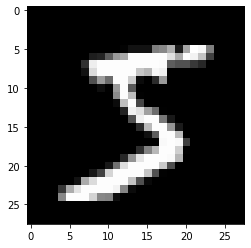

In [129]:
plt.imshow(single_image,cmap='gray')

In [130]:
y_train.shape

(60000,)

In [131]:
X_train.min()

0

In [132]:
X_train.max()

255

In [133]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [134]:
X_train_scaled.min()

0.0

In [135]:
X_train_scaled.max()

1.0

In [136]:
y_train[0]

5

In [137]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [138]:
type(y_train_onehot)

numpy.ndarray

In [139]:
y_train_onehot.shape

(60000, 10)

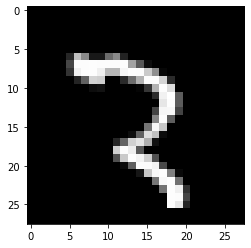

In [140]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [141]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [142]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [143]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1))) 
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(layers.AvgPool2D (pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='tanh')) 
model.add(layers.Dense(10, activation ='softmax'))



In [144]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 average_pooling2d_3 (Averag  (None, 14, 14, 32)       0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                200736    
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 201,386
Trainable params: 201,386
Non-trainable params: 0
________________________________________________

In [145]:
# Choose the appropriate parameters
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [146]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 25s 26ms/step - loss: 0.2780 - accuracy: 0.9206 - val_loss: 0.1147 - val_accuracy: 0.9674
Epoch 2/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0996 - accuracy: 0.9701 - val_loss: 0.0779 - val_accuracy: 0.9759
Epoch 3/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0684 - accuracy: 0.9796 - val_loss: 0.0641 - val_accuracy: 0.9800
Epoch 4/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0537 - accuracy: 0.9841 - val_loss: 0.0580 - val_accuracy: 0.9813
Epoch 5/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0648 - val_accuracy: 0.9798


In [147]:
metrics = pd.DataFrame(model.history.history)

In [148]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.278042,0.920600,0.114698,0.9674
1,0.099592,0.970083,0.077911,0.9759
2,0.068439,0.979617,0.064120,0.9800
3,0.053660,0.984067,0.058014,0.9813
4,0.044244,0.986367,0.064751,0.9798


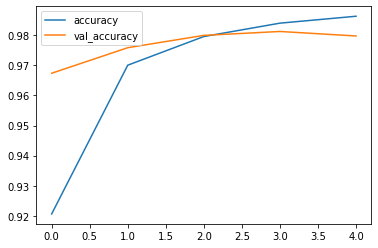

In [149]:
metrics[['accuracy','val_accuracy']].plot()

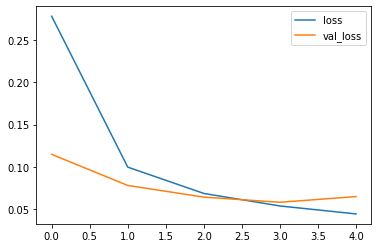

In [150]:
metrics[['loss','val_loss']].plot()

In [151]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [152]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 971    0    2    0    2    2    1    1    1    0]
 [   0 1132    0    2    0    0    1    0    0    0]
 [   2    4 1013    0    3    0    0   10    0    0]
 [   0    0    2 1002    0    3    0    2    1    0]
 [   0    1    0    0  980    0    0    0    0    1]
 [   2    0    0    6    0  881    1    1    0    1]
 [   6    3    0    1    9    5  933    0    1    0]
 [   0    4    7    2    0    0    0 1014    1    0]
 [   6    3    6   11    4    9    1   13  916    5]
 [   3    6    1    8   15    5    0   15    0  956]]


In [153]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.97      1.00      0.98       982
           5       0.97      0.99      0.98       892
           6       1.00      0.97      0.98       958
           7       0.96      0.99      0.97      1028
           8       1.00      0.94      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



In [154]:
img = image.load_img('seveni.jpeg')

In [155]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [156]:

img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [157]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [158]:
print(x_single_prediction)

[7]


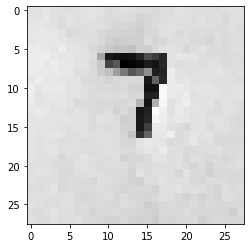

In [159]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')